# Predicting Heart Disease

Addison 2022-03-26

## Introduction

This project aims to build a model to predict the probability of getting a heart disease of a person based on some information about their health condition. To this end, this project will use a dataset that contains 918 rows, each of which represents some demographic and health information of a patient. The dataset could be obtained through this link:

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


Here are the descriptions for all the columns:

**Age** - age of a patient in years

**Sex** - age of a patient (**M:** Male, **F:** Female)

**ChestPainType** - chest pain type 

                + TA: Typical Angina
                + ATA: Atypical Angina
                + NAP: Non-Anginal Pain
                + ASY: Asymptomatic

**RestingBP** - resting blood pressure in mmHg

**Cholesterol** - serum cholesterol in mg/dl

**FastingBS** - fasting blood sugar (**1:** FastingBS > 120 mg/dl, **0:** other cases)

**RestingECG** - resting electrocardiogram results
                
                + Normal: Normal
                + ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
                + LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
                

**MaxHR** - maximum heart rate achieved

**ExerciseAngina** - exercise-induced angina (**Y:** Yes, **N:** No)

**Oldpeak** - oldpeak = ST (numeric value measured in depression)

**ST_Slope** - the slope of the peak exercise ST segment

                + Up: upsloping
                + Flat: flat 
                + Down: downsloping
                
**HeartDisease** - output class (**1:** heart disease, **0:** Normal)


## Exploring and Cleaning the Data

To start with, let's have a quick look at the first few rows as well as essential information about the data to imagine how the data looks like as well as get to know the data types of columns as well as the number of unique and non-null values in each column.

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Based on the tables above, it is obvious that there are no null values in the dataset. Taking account of the description of columns, datatypes of columns, and the number of unique values in each column, we categorize columns as follows:

- **categorial variables:** Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease 
- **numerical variables:** Age, RestingBP, Cholesterol, MaxHR, Oldpeak

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


It is not reasonable that **RestingBP** and **Cholesterol** = 0. We will examine rows having patterns like that and then apply suitable data cleaning methods.

In [6]:
data[data["RestingBP"] == 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [7]:
data[data["Cholesterol"] == 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Since there is only one row whose **RestingBP** = 0, we are going to delete it since the removal of this row will almost not affect our data analysis. 

On the other hand, there are 172 rows whose **Cholesterol** = 0, making up nearly 20% of the dataset. Thus, instead of removing these rows, we are going to replace **Cholesterol** values of 0 with the corresponding median of **Cholesterol** values.
- In case a patient whose **Cholesterol** = 0 was diagnosed with heart disease (**Heart Disease** = 1), this **Cholesterol** value will be replaced with the median of non-zero **Cholesterol** values whose  corresponding **Heart Disease** values = 1

- In case a patient whose **Cholesterol** = 0 was not diagnosed with heart disease (**Heart Disease** = 0), this **Cholesterol** value will be replaced with the median of non-zero **Cholesterol** values whose corresponding **Heart Disease** values = 0

In [8]:
data_1 = data[data["RestingBP"] != 0]

In [9]:
median_c_h1 = data_1[(data_1["Cholesterol"] != 0) & (data_1["HeartDisease"] == 1)]["Cholesterol"].median()
median_c_h1

246.0

In [10]:
median_c_h0 = data_1[(data_1["Cholesterol"] != 0) & (data_1["HeartDisease"] == 0)]["Cholesterol"].median()
median_c_h0

231.5

In [11]:
data_1.loc[(data_1["HeartDisease"] == 1) & (data_1["Cholesterol"] == 0) , "Cholesterol"] = 246 

In [12]:
data_1.loc[(data_1["HeartDisease"] == 0) & (data_1["Cholesterol"] == 0) , "Cholesterol"] = 231.5 

/var/folders/tl/svtqjw_s0kn4lpthrk3xjwpr0000gn/T/ipykernel_9615/2280276721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.loc[(data_1["HeartDisease"] == 0) & (data_1["Cholesterol"] == 0) , "Cholesterol"] = 231.5


In [13]:
data_1.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.573610,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.385261,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,246.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The minimum values of **Cholesterol** and **RestingBP** changed after we cleaned the dataset. All the values in the dataset look reasonable now.

Based on the table above, we can see that the average age of patients in the dataset is about 53.5, suggesting that they are likely to be vulnerable to diseases since they are getting old. Their average **RestingBP** (normal: < 120)  and **Cholesterol** (normal: < 200) are high, explaining why the majority of patients in the dataset were diagnosed with heart disease (mean of **HeartDisease** > 0.5) since these two factors are commonly known for linking to heart disease.

Next, we will visualize the categorical variables for exploratory purposes.

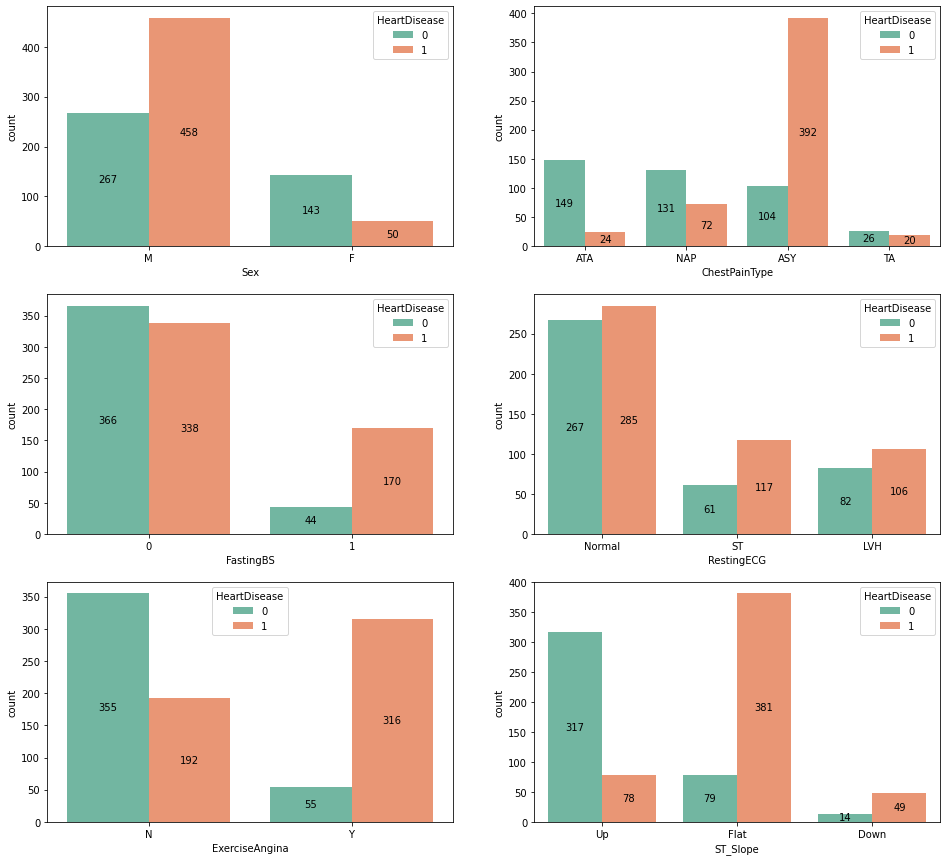

In [14]:
cat_column = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]
fig = plt.figure(figsize=(16,15))

for i, col in enumerate(cat_column[:-1]):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(x=data[col], hue=data["HeartDisease"], ax=ax, palette = "Set2")
    
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

From the charts above, it is evident that the **male patients outnumber their counterparts**, which could make our prediction model later biased. 

We also notice some patterns of patients:

- Patients whose **FastingBS > 120 mg/dl** have a higher probability of getting heart disease than those whose **FastingBS < 120 mg/dl**.

- Patients who have **exercise-induced** have a higher probability of getting heart disease than those who do not.

- Patients who have **ASY chest pain type** have a higher probability of getting heart disease than those who have other chest pain types.

- Patients who have **flat or down ST slope** have a higher probability of getting heart disease than those who have up ST slope.

## Data engineering

Now, we are going to dummy-code categorical columns in the dataset.

In [15]:
data_1_dummies = pd.get_dummies(data_1, drop_first=True)
data_1_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## Building a prediction model with all features

In this section, we are about to build a prediction model with all features using the Random Forest Classifier and K Neighbors Classifier. 

In the next section, we will build a prediction model with selective features using the Random Forest Classifier and K Neighbors Classifier. 

We also will consider taking either of the two models concerning the trade-off between the speed of model operation and the accuracy of the model given that the Random Forest Classifier tends to generate more accurate results but more slowly than the other model.

Now, we are going to split our dataset into training (70% of the dataset) and testing (30% of the dataset) sets. 

Since we use all the features in this section, the training set will include all the columns in the dataset except the **HeartDisease** column since it is our target.

The testing test will include only the **HeartDisease** column since it is our target.

In [16]:
X = data_1_dummies.drop(["HeartDisease"], axis=1)
y = data_1_dummies["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 777)


Next, we will tune some parameters of our model, fit the dataset into the model, and then use grid search to find the best group of parameters and the best score among training models. We will use the Random Forest Classifier first.

In [17]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(5, 10)),'min_samples_leaf': list(range(50, 55)), 
                  'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_*100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 3500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/s

{'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 50}
86.10817307692308


After getting the best group of parameters and the best score, we will apply the chosen model to our testing set and then calculate the accuracy of the model on the test set.

In [18]:
predictions = clf.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 85.14


This model's accuracy is quite good, meaning that our model tends to predict correctly whether a patient has heart disease.

Next, we will try the K Neighbors Classifier. We will tune some parameters of our model, fit the dataset into the model, and then use grid search to find the best group of parameters and the best score among training models.

In [19]:
features = data_1_dummies.drop(["HeartDisease"], axis=1).columns
features

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
grid_params = {"n_neighbors": range(1, 20), "metric": ["minkowski", "manhattan"]}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
knn_grid.best_score_*100, knn_grid.best_params_

(86.89074612403101, {'metric': 'manhattan', 'n_neighbors': 14})

After getting the best group of parameters and the best score, we will apply the chosen model to our testing set and then calculate the accuracy of the model on the test set.

In [21]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 84.42


This model's accuracy is better than that of the Random Forest model. In addition, the execution time of this model is also faster.

## Building a prediction model with selective features

In this section, we are about to build a prediction model with selective features using the Random Forest Classifier and K Neighbors Classifier. 

We will choose variables whose strength of correlation with **Heart Disease** > 0.3 as our features for the model.

In [22]:
k = abs(data_1_dummies.corr()) > 0.3
k["HeartDisease"]

Age                  False
RestingBP            False
Cholesterol          False
FastingBS            False
MaxHR                 True
Oldpeak               True
HeartDisease          True
Sex_M                 True
ChestPainType_ATA     True
ChestPainType_NAP    False
ChestPainType_TA     False
RestingECG_Normal    False
RestingECG_ST        False
ExerciseAngina_Y      True
ST_Slope_Flat         True
ST_Slope_Up           True
Name: HeartDisease, dtype: bool

The following list includes all the selected features that will be used for the prediction model later.

In [23]:
features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ChestPainType_ATA",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

Next, we will do the same splitting practice and apply the Random Forest  model in the previous section to the training and testing tests in this section.

In [24]:
X = data_1_dummies[features]
y = data_1_dummies["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 777)

In [25]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(5, 10)),'min_samples_leaf': list(range(50, 55)),
                  'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_*100)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 3500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/s

{'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 51}
84.39182692307693


In [26]:
predictions = clf.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 83.33


This model's accuracy is slightly lower than that of the two models in the previous section.

Now, will try the K Neighbors model. We will do the same splitting practice and apply the K Neighbors model in the previous section to the training and testing tests in this section.

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
knn_grid.best_score_*100, knn_grid.best_params_

(84.39559108527132, {'metric': 'manhattan', 'n_neighbors': 19})

In [28]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 84.06


This model's accuracy is quite similar to that of the other models that we have tried (just slightly lower), suggesting that we should use this model and selective features to reduce the execution time but still guarantee a high level of accuracy.

## Conclusion
We should use selective features and the K Neighbors Classifier to build a model for heart disease prediction since this model generates results fast with a high level of accuracy. 

Here are the selected features for the prediction model:
  **"MaxHR",
    "Oldpeak",
    "Sex_M",
    "ChestPainType_ATA",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up".**
    
## Suggestions for future research
- Collect more data on female patients to reduce the bias towards male patients and increase the accuracy of the model
- Try more parameters to see whether they help increase the accuracy of the model
- Try other models to see whether they work better than the K Neighbors model in terms of execution time and accuracy